### Why we need tools for big data visualization?
#### We need tools for big data visualization becuase Visualization tools allow us to explore, analyze, and communicate insights from large data sets more effectively and efficiently. By presenting data in a visual format, we can identify patterns, trends, and relationships that might be difficult to see

In [1]:
!pip install pydeck

In [5]:
!pip install geopandas

  Using cached geopandas-0.12.2-py3-none-any.whl (1.1 MB)
  Using cached pyproj-3.5.0-cp39-cp39-win_amd64.whl (5.1 MB)


In [2]:
!pip install wget

  Using cached wget-3.2-py3-none-any.whl


In [7]:
import pydeck
import pandas as pd
import geopandas as gpd

In [3]:
import wget

In [3]:
pydeck.__version__

'0.8.0'

# http://s3.amazonaws.com/datashader-data/nyc_taxi.csv

url = "http://s3.amazonaws.com/datashader-data/nyc_taxi.csv"
taxi_df = pd.read_csv(url)

In [4]:
url = "http://s3.amazonaws.com/datashader-data/nyc_taxi.csv"
wget.download(url)

'nyc_taxi.csv'

In [7]:
taxi_df = pd.read_csv('nyc_taxi.csv') 
taxi_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_x,pickup_y,RateCodeID,store_and_fwd_flag,dropoff_x,dropoff_y,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-8.236963e+06,4.975553e+06,1,N,-8.234835e+06,4.975627e+06,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-8.237826e+06,4.971752e+06,1,N,-8.237021e+06,4.976875e+06,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-8.238654e+06,4.970221e+06,1,N,-8.238124e+06,4.971127e+06,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
3,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-8.234434e+06,4.977363e+06,1,N,-8.238108e+06,4.974457e+06,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30
4,1,2015-01-10 20:33:39,2015-01-10 20:58:31,1,2.20,-8.235781e+06,4.972012e+06,1,N,-8.236804e+06,4.975483e+06,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30


In [8]:
taxi_df.shape

(10679307, 19)

In [9]:
taxi_gdf = gpd.GeoDataFrame(taxi_df,  # convert the dataframe to geodataframe
                            geometry=gpd.points_from_xy(x=taxi_df.pickup_x, 
                                                        y=taxi_df.pickup_y))

<AxesSubplot:>

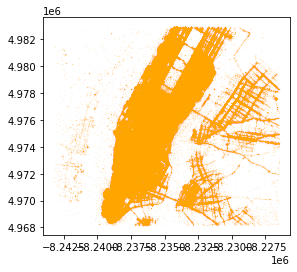

In [11]:
taxi_gdf.plot(markersize=0.001, color = 'orange')

In [13]:
covid_url = "https://raw.githubusercontent.com/GeoDS/COVID19USFlows-WeeklyFlows-Ct2020/master/weekly_flows/ct2ct/2020_12_21/weekly_ct2ct_2020_12_21_10.csv"
wget.download(covid_url)

'weekly_ct2ct_2020_12_21_10.csv'

In [23]:
covid = pd.read_csv("weekly_ct2ct_2020_12_21_10.csv")
covid_df = pd.DataFrame(covid)

In [24]:
covid_df

,geoid_o,geoid_d,lng_o,lat_o,lng_d,lat_d,date_range,visitor_flows,pop_flows
0,39133600200,39133602100,-81.244887,41.310936,-81.347778,41.027146,12/21/20 - 12/27/20,4,88.0
1,39133600200,39085203400,-81.244887,41.310936,-81.328386,41.666611,12/21/20 - 12/27/20,8,176.0
2,39133600200,12081001204,-81.244887,41.310936,-82.669569,27.506230,12/21/20 - 12/27/20,8,176.0
3,39133600200,39007001001,-81.244887,41.310936,-80.913550,41.656346,12/21/20 - 12/27/20,4,88.0
4,39133600200,39035184104,-81.244887,41.310936,-81.469593,41.394236,12/21/20 - 12/27/20,31,683.0
...,...,...,...,...,...,...,...,...,...
352666,39017011004,39017010301,-84.516516,39.368032,-84.534489,39.523899,12/21/20 - 12/27/20,4,72.0
352667,39017011004,39017000300,-84.516516,39.368032,-84.563734,39.385370,12/21/20 - 12/27/20,4,72.0
352668,39017011004,39017010500,-84.516516,39.368032,-84.540897,39.431057,12/21/20 - 12/27/20,4,72.0
352669,40121485700,12113010819,-95.510934,35.066884,-86.834655,30.406693,12/21/20 - 12/27/20,4,44.0


In [26]:
covid_df_1 = covid_df[covid_df.geoid_o == 51820003400]

In [29]:
covid_df_1.to_csv('covid_geoid_51820003400.csv')

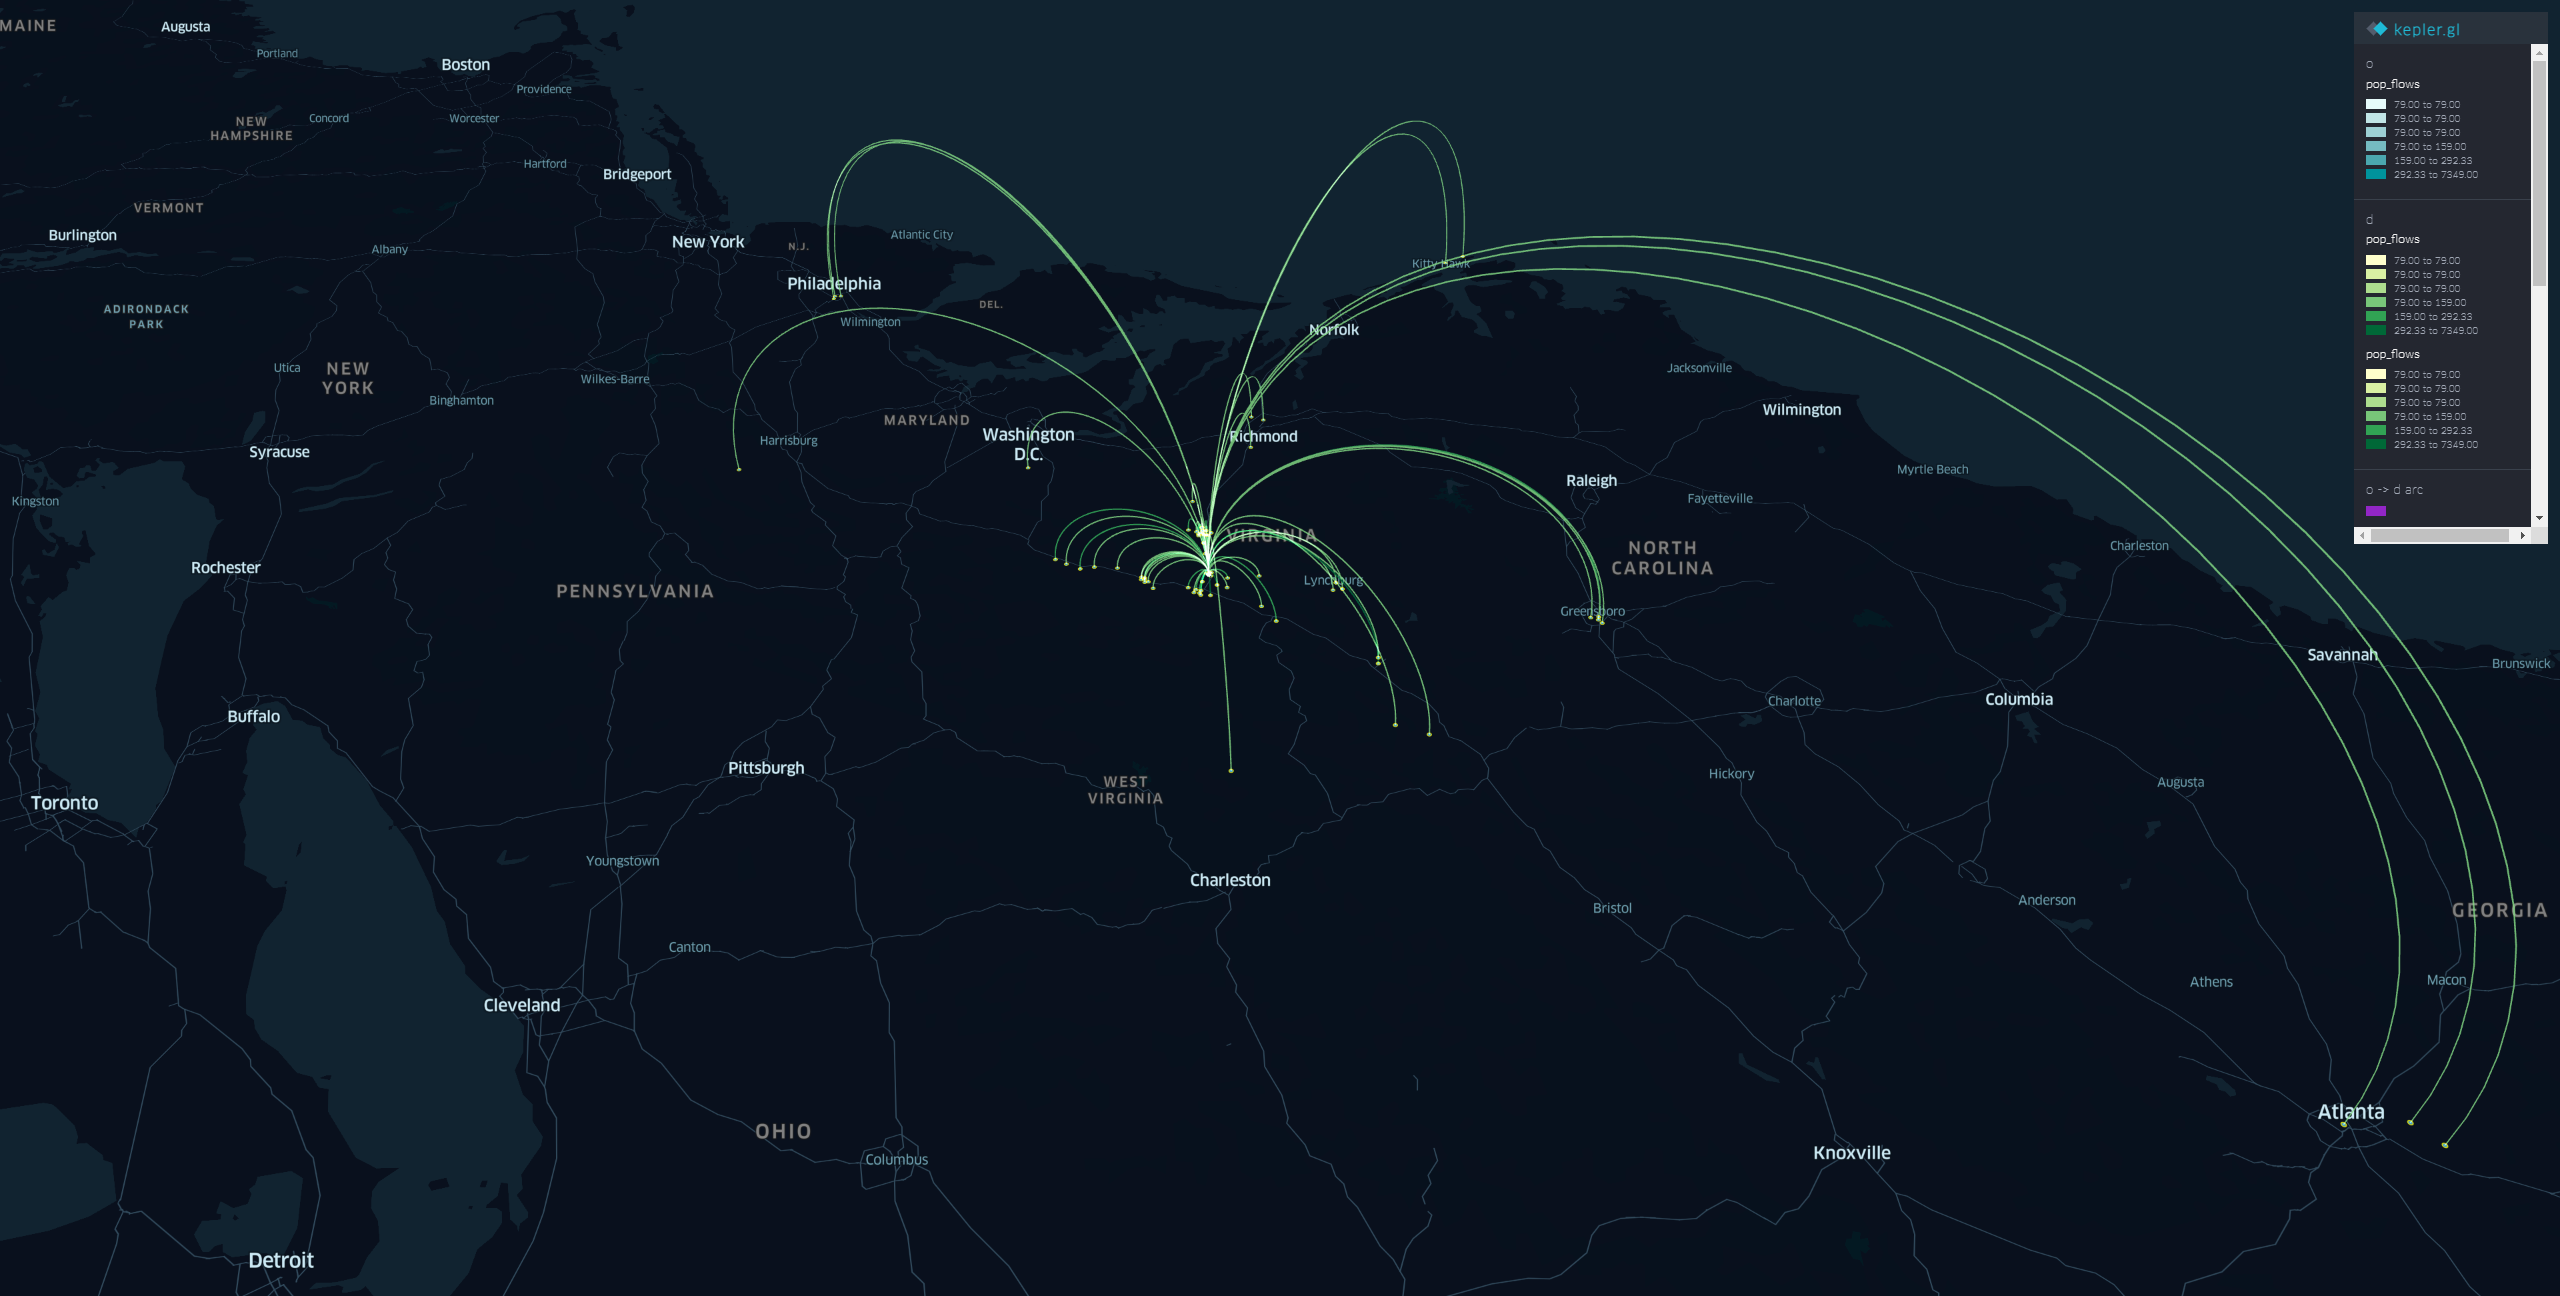

## Task 2: Pydeck

In [12]:
import pydeck as pdk

In [51]:
bounding_box = [-80.19088396, 38.21410489, -79.19088396, 39.21410489]

def in_bounding_box(point):
    lng, lat = point
    in_lng_bounds = bounding_box[0] <= lng <= bounding_box[2]
    in_lat_bounds = bounding_box[1] <= lat <= bounding_box[3]
    return in_lng_bounds and in_lat_bounds


In [54]:
in_bounding_box([-80,39])

True

In [41]:
# read csv data
df = pd.read_csv("weekly_ct2ct_2020_12_21_10.csv")
df.head()

,geoid_o,geoid_d,lng_o,lat_o,lng_d,lat_d,date_range,visitor_flows,pop_flows
0,39133600200,39133602100,-81.244887,41.310936,-81.347778,41.027146,12/21/20 - 12/27/20,4,88.0
1,39133600200,39085203400,-81.244887,41.310936,-81.328386,41.666611,12/21/20 - 12/27/20,8,176.0
2,39133600200,12081001204,-81.244887,41.310936,-82.669569,27.506230,12/21/20 - 12/27/20,8,176.0
3,39133600200,39007001001,-81.244887,41.310936,-80.913550,41.656346,12/21/20 - 12/27/20,4,88.0
4,39133600200,39035184104,-81.244887,41.310936,-81.469593,41.394236,12/21/20 - 12/27/20,31,683.0


In [55]:
df = df[df[["lng_o", "lat_o"]].apply(lambda row: in_bounding_box(row), axis=1)]
df = df[df[["lng_d", "lat_d"]].apply(lambda row: in_bounding_box(row), axis=1)]
df.head()

,geoid_o,geoid_d,lng_o,lat_o,lng_d,lat_d,date_range,visitor_flows,pop_flows
6922,51015070800,51015070800,-79.190884,38.214105,-79.190884,38.214105,12/21/20 - 12/27/20,158,3752.0
40376,54083966100,54075960102,-79.852674,38.929613,-79.826632,38.545712,12/21/20 - 12/27/20,4,95.0
40391,54083966100,54083966400,-79.852674,38.929613,-79.847263,38.842272,12/21/20 - 12/27/20,163,3877.0
40409,54083966100,54083966100,-79.852674,38.929613,-79.852674,38.929613,12/21/20 - 12/27/20,285,6779.0
40416,54083966100,54083966000,-79.852674,38.929613,-79.888452,38.941437,12/21/20 - 12/27/20,105,2497.0


In [57]:
# band colors for arc lines
green_band = [0, 255, 0, 80] # brighter green
red_band = [255, 69, 0, 80] # bright orange-red

# specify a deck.gl ArcLayer
arc_layer = pdk.Layer(
    "ArcLayer",
    data=df, # loaded dataframe within bbox view
    get_width="2", # width of each arc
    get_source_position=["lng_o", "lat_o"], # specific origin longitude, latitude
    get_target_position=["lng_d", "lat_d"], # specific destination longitude, latitude
    get_tilt=15, # determines the title of arc
    get_source_color=green_band, # color for origin arc
    get_target_color=red_band, # color for destination arc
    pickable=True,
    auto_highlight=True,
)

# determine display parameters
view_state = pdk.ViewState(latitude=39, longitude=-80, bearing=45, pitch=50, zoom=7)

# text to displayed on hover
text = {"html": "{visitor_flows} visitors <br /> commuter origin is red; commuter destination is green"}
r = pdk.Deck(arc_layer, initial_view_state=view_state, tooltip=text)

# renders interactive HTML 
r.to_html("arc_layer.html")

## Task 3: DataShader

In [2]:
!pip install colorcet

In [4]:
!pip install datashader

  Created wheel for datashape: filename=datashape-0.5.2-py3-none-any.whl size=59454 sha256=8290e7a6356934a99ba16719720bf9fccda5caa1b8f4576c9721fcee1ebae643
  Stored in directory: c:\users\ramak\appdata\local\pip\cache\wheels\42\ef\d7\781cf80d4146d76b3d2ed2510113d78c2643c842cc6c22918d
Successfully built datashape
  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:
      Successfully uninstalled packaging-21.0


In [5]:
import functools
import colorcet
import datashader as ds
import datashader.transfer_functions as tf
from colorcet import fire
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9

In [8]:
df = pd.read_csv(r"census-midwest.csv")
df.head()

,west,north,race
0,-11443499.0,5927269.0,w
1,-11443482.0,5927260.0,w
2,-11443420.0,5927274.5,w
3,-11443353.0,5927362.0,w
4,-11443336.0,5927350.0,w


In [9]:
# bounds of USA, LakeMichigan, Chicago(IL), Madison(WI)
# Take Northeast, Southwest bounds and order them by (min long, max long), (min lat, max last)
USA           = ((-124.72,  -66.95), (23.55, 50.06))
Madison       = (( -89.60,  -89.21), (43.00, 43.14))

# converts lng, lat input (Web Mercator) to UTM meters
from datashader.utils import lnglat_to_meters as webm
# creates a list comprehension that unpacks to x_range (lng), y_range (lat)
x_range,y_range = [list(r) for r in webm(*USA)]

# determines height and width of the plot
plot_width  = int(900)
plot_height = int(plot_width*7.0/12)

# black background for generated raster
background = "black"

In [21]:
from functools import partial 
from datashader.utils import export_image # exports image
from datashader.colors import colormap_select, Greys9 #colormap_select allows to select colors based on function
from IPython.display import HTML, display

# storing the functions to variables
export = partial(export_image, background = background, export_path="OUTPUT")
cm = partial(colormap_select, reverse=(background!="black"))

# adjusts width within jupyter notebook to display the rendered image
display(HTML("<style>.container { width:100% !important; }</style>"))

In [22]:
# creates canvas for display
cvs = ds.Canvas(plot_width, plot_height, *webm(*USA))\

# input the data as points to canvas
agg = cvs.points(df, 'west', 'north')

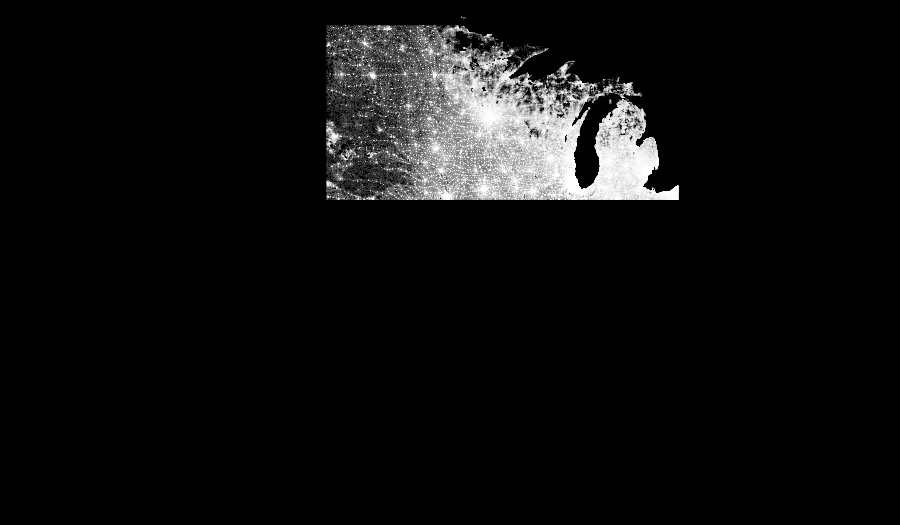

In [23]:
# create and export a gray scale image for USA
export(tf.shade(agg, cmap = cm(Greys9,0.2), how='eq_hist'),"midwest_gray_eq_hist")

In [24]:

if background == "black":
      color_key = {'w':'aqua', 'b':'lime',  'a':'red', 'h':'fuchsia', 'o':'yellow' }
else: color_key = {'w':'blue', 'b':'green', 'a':'red', 'h':'orange',  'o':'saddlebrown'}

In [25]:
# assigns 'race' column as a category type
df['race'] = df['race'].astype('category')

In [26]:
def create_image(longitude_range, latitude_range, w=plot_width, h=plot_height, method = 'eq_hist'):
    x_range,y_range=webm(longitude_range,latitude_range)
    cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, y_range=y_range)
    agg = cvs.points(df, 'west', 'north', ds.count_cat('race'))
    img = tf.shade(agg, color_key=color_key, how=method)
    return img

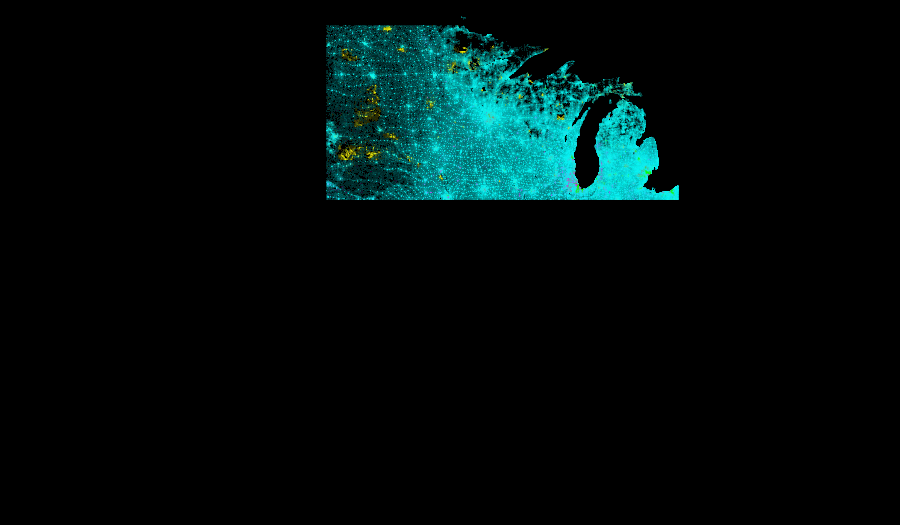

In [27]:
export(create_image(*USA),"Midwest")

The eq_hist method is used to equalize the histogram of values in an image for optimal display. By doing so, it becomes possible to discern other values present in the image apart from the most frequently occurring one. This approach is particularly useful in cases where it is necessary to obtain a comprehensive overview and an equalized understanding of the spatial context.

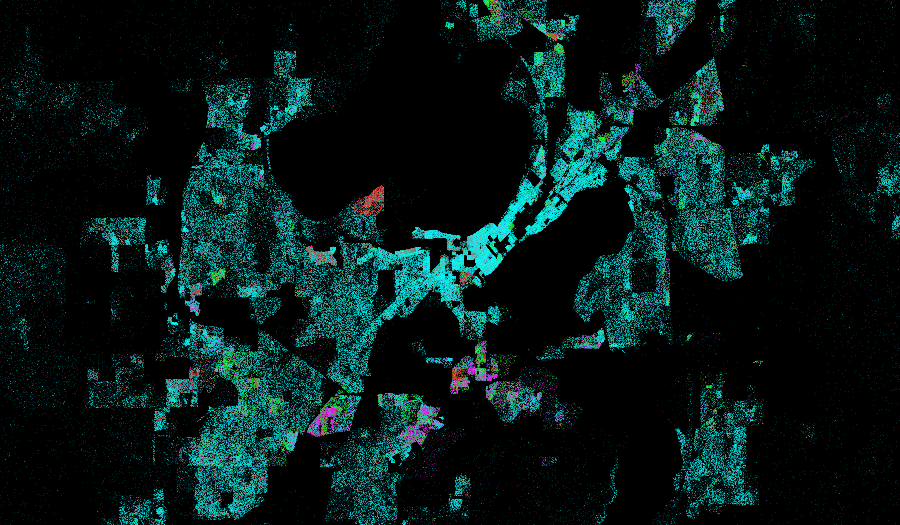

In [28]:
# eq_hist method is a default method as it produces best results for an overview
export(create_image(*Madison),"Madison_eq_hist")

The linear method is used to calibrate the maximum intensity as 255 and the minimum intensity as 0, thereby generating a linear scale of color values from 0 to 255 in our case. The application of this method can help to identify clusters of the highest values or hotspots within a raster. This approach can be especially useful for detecting and analyzing spatial patterns in the data.

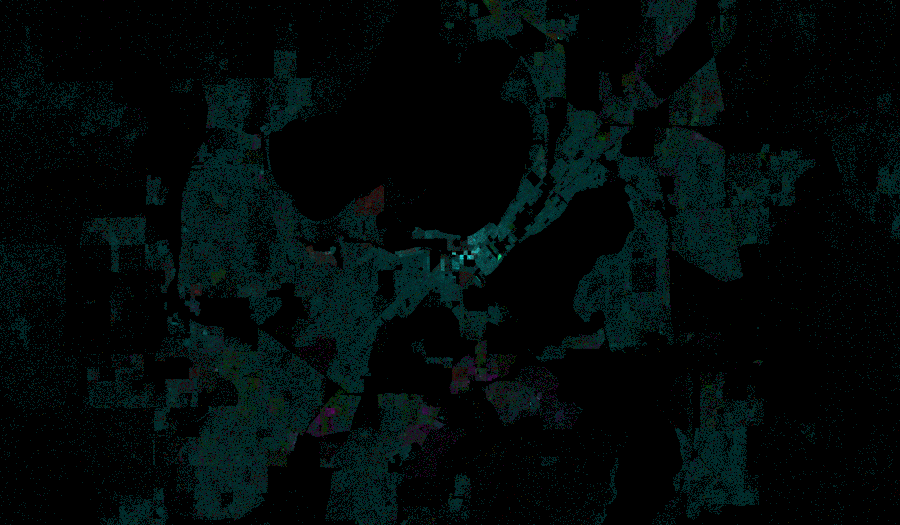

In [29]:
# linear method
export(create_image(*Madison, method = "linear"),"Madison_linear")

The log scale method is another approach that can be used to adjust the intensity of values in an image. Instead of linear scaling, this method applies logarithmic scaling across the frequency of repeated values. As a result, underrepresented data is excluded from the image, and only the repeating values are presented. This approach can help to eliminate noise and better understand dense neighborhoods within the analyzed bounding box. By using the log method, it becomes possible to achieve a more accurate representation of the data while minimizing distortions caused by outliers or underrepresented values.

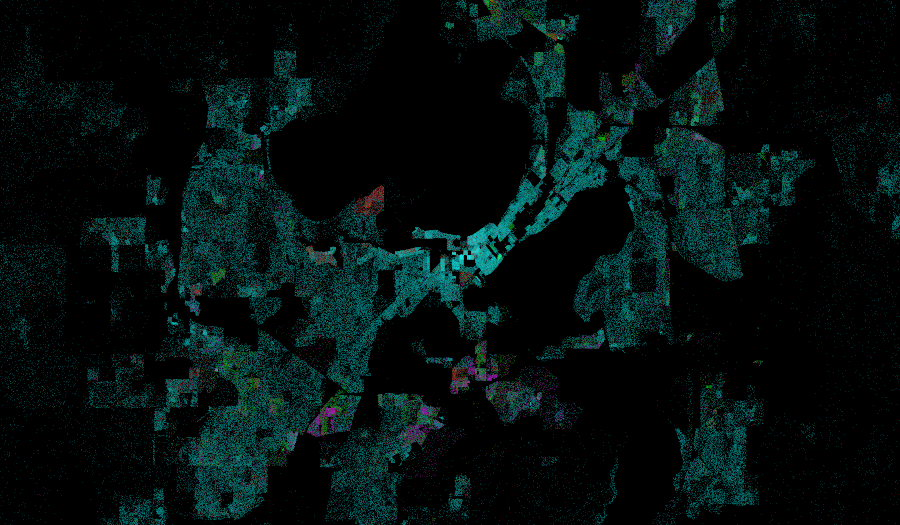

In [30]:
# log method
export(create_image(*Madison, method = "log"),"Madison_log")